# Basics of automatic differentiation in PyTorch

In this notebook, you will go through the basic notions of automatic differentiation (aka autodiff) in PyTorch.

## 1. Manual differentiation in pure Python

Before starting with `pytorch` and its automatic differentiation features, let us have a look at how to do manual differentiation in Python.

To do so, we will use a very basic example in 1D: let $x$ be a scalar and let $y$ be defined as:

$$y = (x - .5)^2$$

Our goal will be to tune $x$ in order to minimize $y$.

**Question 1.1.** Define a function `f` that takes `x` as input and returns `y` as defined above. 

In [ ]:
def f(x):
    return (x - .5) ** 2

In order to be able to minimize, we will use a strategy called gradient descent.
The idea of gradient descent is to iteratively update $x$ by moving it in the opposite direction of the gradient $\frac{\partial y}{\partial x}$.
We hence need to be able to compute $\frac{\partial y}{\partial x}$.
Since we do not rely on autodiff for now, we need to provide the explicit formula for this derivative.

**Question 1.2.** Define a function `grad_f` that takes `x` as input and returns $\frac{\partial y}{\partial x}$.

In [ ]:
def grad_f(x):
    return 2 * (x - .5)

The basic idea behind gradient descent is to iteratively update $x$ using the following update rule:

$$x \leftarrow x - \eta \frac{\partial y}{\partial x}$$

**Question 1.3.** Define a starting value for `x` and a step size `eta` and apply gradient descent for 30 steps.

In [13]:
x = 0.125

stepsize = 0.1
n_iter = 30

for i in range(n_iter):
    print(x)
    y = f(x)
    x -= stepsize * grad_f(x)

0.125
0.2
0.26
0.308
0.3464
0.37712
0.401696
0.4213568
0.43708544
0.449668352
0.4597346816
0.46778774528
0.474230196224
0.4793841569792
0.48350732558336
0.486805860466688
0.4894446883733504
0.49155575069868035
0.49324460055894426
0.4945956804471554
0.49567654435772435
0.49654123548617946
0.4972329883889436
0.4977863907111549
0.4982291125689239
0.49858329005513913
0.4988666320441113
0.49909330563528903
0.4992746445082312
0.499419715606585


**Question 1.4.** Is the resulting value for `x` close to the value you would expect as a minimizer for $y = f(x)$?

_YOUR ANSWER HERE_

## 2. PyTorch and the automatic computation of gradients

PyTorch is very similar to numpy in practice. One main difference is that one can ask, at any moment, for the automatic computation of gradients.

To do so, if one wants to trigger the computation of $\frac{\partial a}{\partial b}$ for any $b$, she should write:

```python
a.backward()
```

This will trigger the computation of the gradient of `a` with respect to any tensor that was involved in the computation of `a`.

And the gradient $\frac{\partial a}{\partial b}$ will be stored in `b.grad`.

**Question 2.1.** Fill the code below to check what the gradient of `x` is before calling `backward()`:

In [ ]:
import torch

def f(x):
    return (x - .5) ** 2

x = torch.tensor(0.125, requires_grad=True)
y = f(x)

print(x.grad)

In [ ]:
import torch

def f(x):
    return (x - .5) ** 2

x = torch.tensor(0.125, requires_grad=True)
y = f(x)

# Fill the code here

**Question 2.2.** Now, trigger the computation of gradients $\frac{\partial y}{\partial x}$ and print this gradient.

In [9]:
y.backward()
print(x.grad)

None
tensor(-0.7500)


## 3. Gradient descent in PyTorch

**Question 3.1.** Try to implement the gradient descent from Section 1 in PyTorch this time. You do not need to use `grad_f` anymore in your computations.
Each iteration should consist in:
1. computing `y` based on the current value for `x` ;
2. explicitly forcing gradient computations ;
3. updating `x` (this step needs to be protected in a `with torch.no_grad():` block) ;
4. zero-ing out gradients of `x` for future steps not to accumulate gradient computations.

In [ ]:
x = torch.tensor(0.125, requires_grad=True)

stepsize = 0.1
n_iter = 30

for i in range(n_iter):
    # Compute y and force gradient computations

    with torch.no_grad():
        # Update x
        pass
    # Zero-out gradients (code below is OK, leave it as it is)
    x.grad.zero_()

In [12]:
x = torch.tensor(0.125, requires_grad=True)

stepsize = 0.1
n_iter = 30

for i in range(n_iter):
    print(x)
    y = f(x)
    y.backward()
    with torch.no_grad():
        x -= stepsize * x.grad
    x.grad.zero_()

tensor(0.1250, requires_grad=True)
tensor(0.2000, requires_grad=True)
tensor(0.2600, requires_grad=True)
tensor(0.3080, requires_grad=True)
tensor(0.3464, requires_grad=True)
tensor(0.3771, requires_grad=True)
tensor(0.4017, requires_grad=True)
tensor(0.4214, requires_grad=True)
tensor(0.4371, requires_grad=True)
tensor(0.4497, requires_grad=True)
tensor(0.4597, requires_grad=True)
tensor(0.4678, requires_grad=True)
tensor(0.4742, requires_grad=True)
tensor(0.4794, requires_grad=True)
tensor(0.4835, requires_grad=True)
tensor(0.4868, requires_grad=True)
tensor(0.4894, requires_grad=True)
tensor(0.4916, requires_grad=True)
tensor(0.4932, requires_grad=True)
tensor(0.4946, requires_grad=True)
tensor(0.4957, requires_grad=True)
tensor(0.4965, requires_grad=True)
tensor(0.4972, requires_grad=True)
tensor(0.4978, requires_grad=True)
tensor(0.4982, requires_grad=True)
tensor(0.4986, requires_grad=True)
tensor(0.4989, requires_grad=True)
tensor(0.4991, requires_grad=True)
tensor(0.4993, requi

## 4. Wrap-up: optimizing parameters of a univariate linear regression model

Below is some code to generate (and visualize) the synthetic dataset you will use in this section.

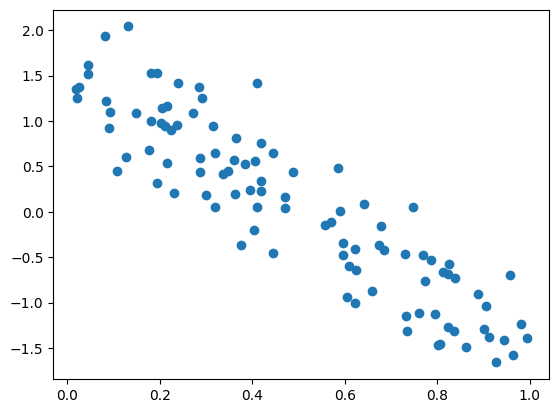

In [21]:
import matplotlib.pyplot as plt

X = torch.rand(100, 1)
# w* = -3, b* = 1.5
y = -3. * X + 1.5 + 0.4 * torch.randn(X.size())

plt.scatter(X.numpy(), y.numpy())

You will try to fit a linear regression model to this dataset.

**Question 4.1.** Given the code that generated the dataset, what should be the ideal values for $w$ and $b$ in your linear model?

_YOUR ANSWER HERE_

**Question 4.3.** Implement a function `mse` that would take `X`, `y`, `w`, `b` as inputs and outputs the mean squared error of the linear model parametrized by `w` and `b` on the dataset $(X, y)$.

In [ ]:
def mse(X, y, w, b):
    y_pred = w * X + b
    return torch.mean((y_pred - y) ** 2)

**Question 4.2.** Implement a gradient descent loop to fit `w` and `b` that would minimize the mean squared error criterion based on the provided dataset. Use a step size of 0.1 and perform 1000 iterations of the algorithm.

In [20]:
w = torch.tensor(0.125, requires_grad=True)
b = torch.tensor(-0.125, requires_grad=True)


stepsize = 0.1
n_iter = 1000

for i in range(n_iter):
    err = mse(X, y, w, b)
    print(w, b, err.item())
    err.backward()
    with torch.no_grad():
        w -= stepsize * w.grad
        b -= stepsize * b.grad
    w.grad.zero_()
    b.grad.zero_()

tensor(0.1250, requires_grad=True) tensor(-0.1250, requires_grad=True) 0.8617132306098938
tensor(0.0788, requires_grad=True) tensor(-0.1221, requires_grad=True) 0.8408882021903992
tensor(0.0356, requires_grad=True) tensor(-0.1150, requires_grad=True) 0.8221014142036438
tensor(-0.0053, requires_grad=True) tensor(-0.1046, requires_grad=True) 0.8046115636825562
tensor(-0.0443, requires_grad=True) tensor(-0.0920, requires_grad=True) 0.788007915019989
tensor(-0.0818, requires_grad=True) tensor(-0.0778, requires_grad=True) 0.7720614671707153
tensor(-0.1181, requires_grad=True) tensor(-0.0625, requires_grad=True) 0.7566422820091248
tensor(-0.1534, requires_grad=True) tensor(-0.0463, requires_grad=True) 0.741675615310669
tensor(-0.1879, requires_grad=True) tensor(-0.0297, requires_grad=True) 0.7271159887313843
tensor(-0.2216, requires_grad=True) tensor(-0.0127, requires_grad=True) 0.7129348516464233
tensor(-0.2547, requires_grad=True) tensor(0.0045, requires_grad=True) 0.6991128325462341
tenso